**Load and Explore the Dataset**

In [56]:
import re
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Check data format
print(df.head())
print(df['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


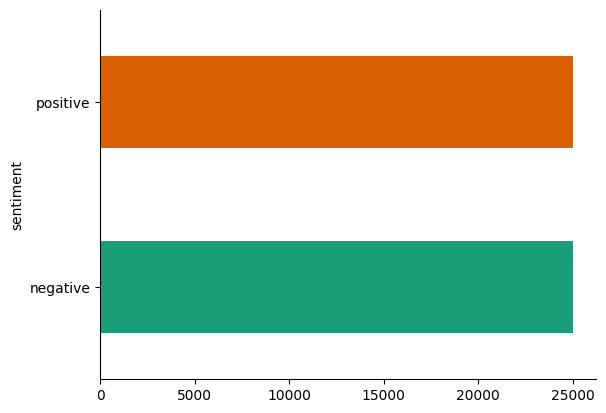

In [58]:
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Text Preprocessing**

In [59]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'<[^>]*>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = word_tokenize(text)  # tokenize
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['clean_review'] = df['review'].apply(preprocess_text)


**Split Data into Train and Test Sets**

In [60]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Feature Extraction with TF-IDF**

In [61]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Train a Machine Learning Model**

**Logistic Regression**

In [62]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

**Naïve Bayes**

In [63]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

**SVM**

In [64]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

**Evaluate the Model**

In [69]:
lry_pred = lr_model.predict(X_test_tfidf)
nby_pred = nb_model.predict(X_test_tfidf)
svmy_pred = svm_model.predict(X_test_tfidf)


def evaluate_model(y_test, y_pred, model_name):
    print("Models Name:", (model_name))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label='positive'))

def Report_model(y_test, y_pred, model_name):
    print("Models Name:", (model_name))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


    # 📌 Evaluate Model
evaluate_model(y_test, lry_pred, "Logistic Regression")
evaluate_model(y_test, nby_pred, "Naïve Bayes")
evaluate_model(y_test, svmy_pred, "SVM")

    # 📌  Classification Repport of Model
Report_model(y_test, lry_pred, "Logistic Regression")
Report_model(y_test, nby_pred, "Naïve Bayes")
Report_model(y_test, svmy_pred, "SVM")

Models Name: Logistic Regression
Accuracy: 0.8945
F1 Score: 0.8956375506973984
Models Name: Naïve Bayes
Accuracy: 0.8648
F1 Score: 0.866640362990728
Models Name: SVM
Accuracy: 0.8837
F1 Score: 0.8843361511685729
Models Name: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Models Name: Naïve Bayes

Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.85      0.86      5000
    positive       0.86      0.88      0.87      5000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

Models Name: SVM

Classifi

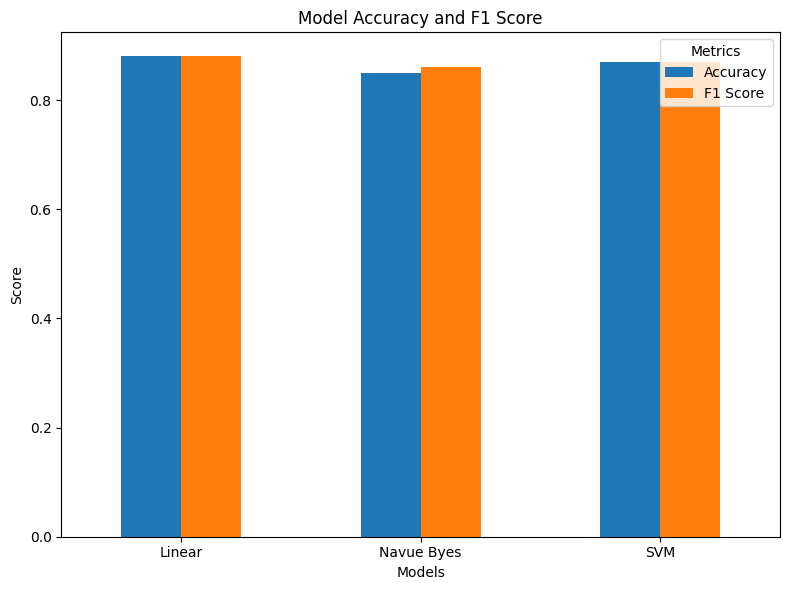

In [51]:
# prompt: Generate bar plot on the base  of accuracy and F1 score# Sample data (replace with your actual model evaluation results)
models = ['Linear', 'Navue Byes', 'SVM']
accuracy = [0.88, 0.85, 0.87]  # Example accuracy scores
f1_scores = [0.88, 0.86, 0.87]   # Example F1 scores


data = {'Model': models, 'Accuracy': accuracy, 'F1 Score': f1_scores}
df_results = pd.DataFrame(data)


# Create the bar plot
ax = df_results.plot(x='Model', y=['Accuracy', 'F1 Score'], kind='bar', figsize=(8, 6))

# Customize the plot
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Accuracy and F1 Score")
ax.legend(title="Metrics")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Save Model**

***Due to Best Models is Logistic Regression so save this model***

In [70]:
import joblib

# Save trained model (e.g., SVM)
joblib.dump(lr_model, 'sentiment_model.pkl')

# Save TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [76]:
# Load model
loaded_model = joblib.load('sentiment_model.pkl')

# Load vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example prediction
sample_text = "This movie was absolutely amazing!"
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(filtered)

clean_text = preprocess_text(sample_text)
vector = loaded_vectorizer.transform([clean_text])
prediction = loaded_model.predict(vector)

print("Predicted Sentiment:", prediction[0])


Predicted Sentiment: positive
